# Module_1:

## Team Members: 
**Shayn Peirce-Cottler and Rizzo Cottler**

## Project Title: 
**Identifying trends and relationships between patient demographic data and hallmarks of Alzheimer's Disease**

## Project Goal: 
This project seeks to understand: 1) if amyloid-beta levels significantly differ between the sexes in healthy patients and patients with Alzheimer's disease, and 2) if amyloid-beta is correlated with the age of death. 

## Disease Background: 
*Fill in information about 11 bullets:*

* Prevalence & incidence
* Economic burden
* Risk factors (genetic, lifestyle) 
* Societal determinants
* Symptoms
* Diagnosis
* Standard of care treatments (& reimbursement) 
* Disease progression & prognosis
* Continuum of care providers
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
* Clinical Trials/next-gen therapies

(Rizzo was too busy chasing squirrels to do this section.)

## Data-Set: 
*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

(Rizzo was too busy chasing rabbits to do this section.)

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

**Code Description:**

The purpose of this code is to use patient data that is contained within two different published .csv files to create a "Patient" class characterized by attributes that describe demographic data (like sex, age at death, Thal Score) and biochemical data (like ameloid-beta levels and tau levels in their brains). 

In [1]:
# conda install -c conda-forge termcolor



In [2]:
#1) BUILD OUR CLASS BY COMBINING TWO .csv FILES OF DATA
 
import csv
import warnings
import matplotlib.pyplot as plt

class Patient: 

    all_patients = []

    death_age = []

    education_lvl = {}

    def __init__(self, DonorID, ABeta40: float , ABeta42: float, tTau: float, pTau: float):

        self.DonorID = DonorID
        self.ABeta40 = ABeta40
        self.ABeta42 = ABeta42
        self.tTau = tTau
        self.pTau = pTau
        self.sex = None
        self.death_age = None
        self.ed_lvl = None
        self.cog_stat = None
        self.age_symp_on = None
        self.age_diag = None 
        self.head_inj = None
        self.thal_score = None
        Patient.all_patients.append(self)

    def __repr__(self):
        return f"{self.DonorID} | sex: {self.sex} | ABeta40 {self.ABeta40} | tTau {self.tTau} | pTau {self.pTau} | Death Age {self.death_age} | Thal Score {self.thal_score}"

    def get_id(self):
        return self.DonorID

    def get_ABeta42(self):
        return self.ABeta42
    
    def get_thal(self):
        return self.thal_score
    
    def get_death_age(self):
        return self.death_age


    @classmethod
    def combine_data(cls, filename: str):
            with open(filename, encoding="utf8") as f:
                reader = csv.DictReader(f)
                rows_of_patients = list(reader)
                #for line in csv create object
                for row in range(len(rows_of_patients)):
                    if Patient.all_patients[row].DonorID == rows_of_patients[row]["Donor ID"]:
                        if rows_of_patients[row]["Sex"] != "":
                            Patient.all_patients[row].sex = rows_of_patients[row]["Sex"]

                        if rows_of_patients[row]["Age at Death"] != "":
                            Patient.all_patients[row].death_age = int(rows_of_patients[row]["Age at Death"])

                        if rows_of_patients[row]["Highest level of education"] != "":
                            Patient.all_patients[row].ed_lvl = rows_of_patients[row]["Highest level of education"]

                        if rows_of_patients[row]["Cognitive Status"] != "":
                            Patient.all_patients[row].cog_stat = rows_of_patients[row]["Cognitive Status"]

                        if rows_of_patients[row]["Age of onset cognitive symptoms"] != "":
                            Patient.all_patients[row].age_symp_on = int(rows_of_patients[row]["Age of onset cognitive symptoms"])

                        if rows_of_patients[row]["Age of Dementia diagnosis"] != "":
                            Patient.all_patients[row].age_diag = int(rows_of_patients[row]["Age of Dementia diagnosis"])

                        if rows_of_patients[row]["Known head injury"] != "":
                            Patient.all_patients[row].head_inj = rows_of_patients[row]["Known head injury"]

                        if rows_of_patients[row]["Thal"] != "":
                            Patient.all_patients[row].thal_score = int(rows_of_patients[row]["Thal"].split()[1])
            
                    else:
                        warnings.warn("IDs do not match.")
   
    @classmethod
    def instantiate_from_csv(cls, filename: str, other_file: str):
    #open csv and create list of all rows
        with open(filename, encoding="utf8") as f:
            reader = csv.DictReader(f)
            rows_of_patients = list(reader)
            #for line in csv create object
            for row in rows_of_patients:
                Patient(
                    DonorID = row['Donor ID'],
                    ABeta40 = float(row['ABeta40 pg/ug']),
                    ABeta42 = float(row['ABeta42 pg/ug']),
                    tTau = float(row['tTAU pg/ug']),
                    pTau = float(row['pTAU pg/ug'])
                )
            Patient.all_patients.sort(key = Patient.get_id)
            Patient.combine_data(other_file)
    

In [3]:
#2) PRINT OUR LIST OF PATIENTS

from patient import Patient

Patient.instantiate_from_csv('UpdatedLuminex.csv', 'UpdatedMetaData.csv')

for patient in Patient.all_patients:
    print(patient)


H19.33.004 | sex: Female | ABeta40 0.019621053 | ABeta42 0.971578947 |tTau 1552.414737 | pTau 1.901052632 | Death Age 80 | Thal Score 0
H20.33.001 | sex: Male | ABeta40 0.215789474 | ABeta42 2.744210526 |tTau 756.0905263 | pTau 2.737894737 | Death Age 82 | Thal Score 2
H20.33.002 | sex: Female | ABeta40 0.000597895 | ABeta42 0.147157895 |tTau 313.5252632 | pTau 2.615789474 | Death Age 97 | Thal Score 0
H20.33.004 | sex: Male | ABeta40 60.76631579 | ABeta42 80.26631579 |tTau 318.5284211 | pTau 7.412631579 | Death Age 86 | Thal Score 5
H20.33.005 | sex: Female | ABeta40 5.136842105 | ABeta42 16.15684211 |tTau 107.3484211 | pTau 1.327368421 | Death Age 99 | Thal Score 3
H20.33.008 | sex: Female | ABeta40 3.991578947 | ABeta42 101.8305263 |tTau 125.9336842 | pTau 2.569473684 | Death Age 92 | Thal Score 4
H20.33.011 | sex: Female | ABeta40 11.84526316 | ABeta42 60.51157895 |tTau 1141.492355 | pTau 8.536842105 | Death Age 93 | Thal Score 5
H20.33.012 | sex: Female | ABeta40 2.529473684 | ABe

Next, we want to sort the patients in order based on a specific attribute. In this case, we are sorting based on ABeta42 levels. 

In [4]:
#3) SORT OUR LIST OF PATIENTS

Patient.all_patients.sort(key=Patient.get_ABeta42, reverse=False)

for patient in Patient.all_patients:
    print(patient)


H21.33.019 | sex: Male | ABeta40 0.001077758 | ABeta42 0.019621053 |tTau 122.2210526 | pTau 2.208421053 | Death Age 75 | Thal Score 1
H21.33.047 | sex: Male | ABeta40 0.000981053 | ABeta42 0.049052632 |tTau 212.9031579 | pTau 3.575789474 | Death Age 90 | Thal Score 2
H21.33.023 | sex: Male | ABeta40 0.000597684 | ABeta42 0.114736842 |tTau 188.3642105 | pTau 1.683157895 | Death Age 102 | Thal Score 0
H21.33.038 | sex: Female | ABeta40 0.079678842 | ABeta42 0.122631579 |tTau 131.0326316 | pTau 2.977894737 | Death Age 84 | Thal Score 1
H21.33.011 | sex: Female | ABeta40 0.000688421 | ABeta42 0.137347368 |tTau 276.5368421 | pTau 3.052631579 | Death Age 83 | Thal Score 0
H20.33.002 | sex: Female | ABeta40 0.000597895 | ABeta42 0.147157895 |tTau 313.5252632 | pTau 2.615789474 | Death Age 97 | Thal Score 0
H21.33.028 | sex: Male | ABeta40 0.072506632 | ABeta42 0.204385895 |tTau 391.1515789 | pTau 3.065263158 | Death Age 72 | Thal Score 1
H20.33.044 | sex: Male | ABeta40 0.007088421 | ABeta42 

Now, we will use dictionaries to sort first based on highest education level, then based on Thal score within each education level.

In [5]:
#4) BUILD DICTIONARIES TO DO SORTING AND SUB-SORTING

@classmethod
def sort_ed(cls):
    for patient in Patient.all_patients:
        Patient.education_lvl.update({patient.ed_lvl: []})
    for patient in Patient.all_patients:
        Patient.education_lvl[patient.ed_lvl].append(patient)

@classmethod
def subsort_thal(cls):
    for key in Patient.education_lvl:
        values = Patient.education_lvl.get(key)
        values.sort(key = Patient.get_thal)
        Patient.education_lvl.update({key: values})


In [6]:
#5) SORT THE SUB-LISTS WITHIN THE LIST AND PRINT IT

from termcolor import colored

Patient.sort_ed()
Patient.subsort_thal()

for key in Patient.education_lvl:
    print(colored(key,"red"))
    for patient in Patient.education_lvl.get(key):
        print(patient)
    print()



High School
H21.33.023 | sex: Male | ABeta40 0.000597684 | ABeta42 0.114736842 |tTau 188.3642105 | pTau 1.683157895 | Death Age 102 | Thal Score 0
H20.33.002 | sex: Female | ABeta40 0.000597895 | ABeta42 0.147157895 |tTau 313.5252632 | pTau 2.615789474 | Death Age 97 | Thal Score 0
H21.33.041 | sex: Female | ABeta40 5.010526316 | ABeta42 88.16947368 |tTau 740.5831579 | pTau 3.327368421 | Death Age 98 | Thal Score 0
H21.33.019 | sex: Male | ABeta40 0.001077758 | ABeta42 0.019621053 |tTau 122.2210526 | pTau 2.208421053 | Death Age 75 | Thal Score 1
H21.33.038 | sex: Female | ABeta40 0.079678842 | ABeta42 0.122631579 |tTau 131.0326316 | pTau 2.977894737 | Death Age 84 | Thal Score 1
H21.33.022 | sex: Female | ABeta40 0.000130411 | ABeta42 7.666315789 |tTau 270.3010526 | pTau 3.095789474 | Death Age 82 | Thal Score 2
H21.33.015 | sex: Male | ABeta40 0.661052632 | ABeta42 10.09578947 |tTau 322.6021053 | pTau 5.006315789 | Death Age 98 | Thal Score 2
H20.33.005 | sex: Female | ABeta40 5.1368

Now, we will create a filter that will return a list of objects with matching attributes to the parameters given. 

In [7]:
#6) MAKE A FILTER TO PULL OUT PATIENTS WITH SPECIIFC ATTRIBUTES

@classmethod
def filter(cls, list, ABeta40:float ="any", ABeta42:float ="any", tTau:float= "any", pTau:float ="any", sex:str ="any", death_age:int ="any", ed_lvl:str ="any", cog_stat:str ="any", age_symp_on:int ="any", age_diag:int ="any", head_inj:str ="any", thal_score:int ="any"):
        all_patients = list
        remove_list = []
        attr_list = (
                    ABeta40,
                    ABeta42,
                    tTau,
                    pTau,
                    sex,
                    death_age,
                    ed_lvl,
                    cog_stat,
                    age_symp_on,
                    age_diag,
                    head_inj,
                    thal_score
                    )
        attr_name = (
                    "ABeta40",
                    "ABeta42",
                    "tTau",
                    "pTau",
                    "sex",
                    "death_age",
                    "ed_lvl",
                    "cog_stat",
                    "age_symp_on",
                    "age_diag",
                    "head_inj",
                    "thal_score"
                    )
        for attr in range(len(attr_list)):
            if attr_list[attr] != "any":
                for patient in all_patients:
                    if getattr(patient,attr_name[attr]) != attr_list[attr]:
                        remove_list.append(patient)
                all_patients = [patient for patient in all_patients if patient not in remove_list]
                remove_list.clear()
        
        return all_patients



We will use the list returned by filter to count the number of healthy and diseased female and male patients in the dataset.  

In [8]:
#7) USE OUR FILTER TO PULL OUT AND COUNT SUB-SETS OF PATIENTS THAT ARE FILTERED

fem_healty_patients = range(len(Patient.filter(Patient.all_patients, sex = "Female", cog_stat = "No dementia")))
male_healthy_patients = range(len(Patient.filter(Patient.all_patients, sex = "Male", cog_stat = "No dementia")))
fem_diseased_patients = range(len(Patient.filter(Patient.all_patients, sex = "Female", cog_stat = "Dementia")))
male_diseased_patients = range(len(Patient.filter(Patient.all_patients, sex = "Male", cog_stat = "Dementia")))

print(f'Female Healthy Patients = {len(fem_healty_patients)} | Male Healthy Patients = {len(male_healthy_patients)}')
print(f'Female Diseased Patients = {len(fem_diseased_patients)} | Male Diseased Patients = {len(male_diseased_patients)}')



Female Healthy Patients = 24 | Male Healthy Patients = 18
Female Diseased Patients = 27 | Male Diseased Patients = 15


Now we will plot using a bar graph, the ABeta42 levels for all females and males and perform a T-test to see if they are significantly different from each other. 

x_fem_bar = 82.28295891770588, ABeta_fem_stdev 201.04034343117254
x_male_bar = 43.331496222272726, ABeta_male_stdev 52.167351666865606
t-statistic: 1.0874349478531717
p-value: 0.2800306894328192


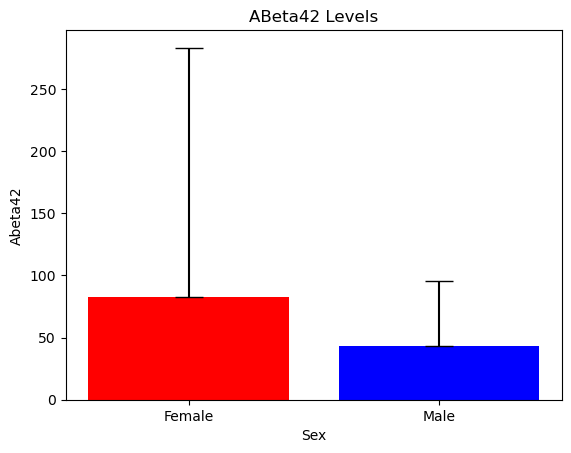

In [9]:
#7) PLOT A BAR GRAPH OF THE SORTED DATA

from patient import Patient
from termcolor import colored
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import statistics 


# Patient.instantiate_from_csv('UpdatedLuminex.csv', 'UpdatedMetaData.csv')


ABeta42_fem_vals = []
ABeta42_male_vals = []

for patient in Patient.filter(Patient.all_patients, sex = "Female"):
     ABeta42_fem_vals.append(patient.ABeta42)
for patient in Patient.filter(Patient.all_patients, sex = "Male"):
     ABeta42_male_vals.append(patient.ABeta42)

x_fem_bar = (statistics.mean(ABeta42_fem_vals))
x_male_bar = (statistics.mean(ABeta42_male_vals))

ABeta_fem_stdev = (statistics.stdev(ABeta42_fem_vals))
ABeta_male_stdev = (statistics.stdev(ABeta42_male_vals))

print(f'x_fem_bar = {x_fem_bar}, ABeta_fem_stdev {ABeta_fem_stdev}')
print(f'x_male_bar = {x_male_bar}, ABeta_male_stdev {ABeta_male_stdev}')

x_fem_vals = range(len(Patient.filter(Patient.all_patients, sex = "Female")))
x_male_vals = range(len(Patient.filter(Patient.all_patients, sex = "Male")))

sex_cols = ['Female', 'Male']
mean_sex_ABeta42 = [x_fem_bar, x_male_bar]
stdev_sex_ABeta42 = [ABeta_fem_stdev, ABeta_male_stdev]
colors = ["pink", "blue"]
yerr = [np.zeros(len(mean_sex_ABeta42)), stdev_sex_ABeta42]

# Equal variance assumed
t_stat, p_val = stats.ttest_ind(ABeta42_fem_vals, ABeta42_male_vals)
print("t-statistic:", t_stat)
print("p-value:", p_val)

plt.bar(sex_cols, mean_sex_ABeta42, yerr=yerr, capsize=10, color=["red", "blue"])
plt.title("ABeta42 Levels")
plt.xlabel("Sex")
plt.ylabel("Abeta42")
plt.show()

Now we will plot using a bar graph, the ABeta42 levels for only diseased females and males and perform a T-test to see if they are significantly different from each other. 

x_fem_diseased_bar = 116.09062038707407, ABeta42_fem_diseased_stdev 268.0393488223147
x_male_diseased_bar = 63.147719297933335, ABeta42_male_diseased_stdev 62.18533533479372
t-statistic: 0.7499829795718433
p-value: 0.45765375434318656


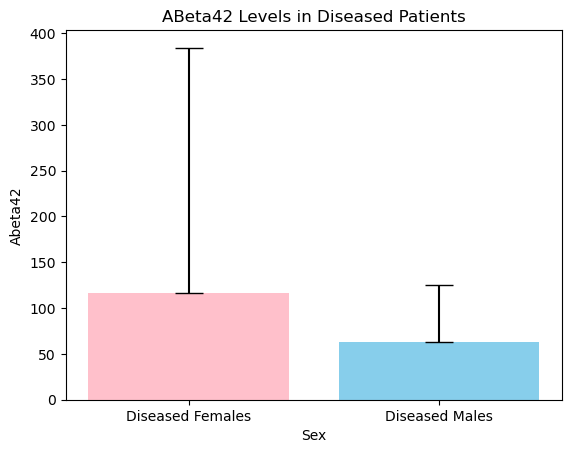

In [10]:
#8) PLOT A BAR GRAPH OF THE FURTHER SORTED DATA

ABeta42_fem_diseased_vals = []
ABeta42_male_diseased_vals = []

for patient in Patient.filter(Patient.all_patients, sex = "Female", cog_stat = "Dementia"):
     ABeta42_fem_diseased_vals.append(patient.ABeta42)
for patient in Patient.filter(Patient.all_patients, sex = "Male", cog_stat = "Dementia"):
     ABeta42_male_diseased_vals.append(patient.ABeta42)

x_fem_diseased_bar = (statistics.mean(ABeta42_fem_diseased_vals))
x_male_diseased_bar = (statistics.mean(ABeta42_male_diseased_vals))

ABeta42_fem_diseased_stdev = (statistics.stdev(ABeta42_fem_diseased_vals))
ABeta42_male_diseased_stdev = (statistics.stdev(ABeta42_male_diseased_vals))

print(f'x_fem_diseased_bar = {x_fem_diseased_bar}, ABeta42_fem_diseased_stdev {ABeta42_fem_diseased_stdev}')
print(f'x_male_diseased_bar = {x_male_diseased_bar}, ABeta42_male_diseased_stdev {ABeta42_male_diseased_stdev}')

x_fem_diseased_vals = range(len(Patient.filter(Patient.all_patients, sex = "Female")))
x_male_diseased_vals = range(len(Patient.filter(Patient.all_patients, sex = "Male")))

sex_diseased_cols = ['Diseased Females', 'Diseased Males']
mean_sex_diseased_ABeta42 = [x_fem_diseased_bar, x_male_diseased_bar]
stdev_sex_diseased_ABeta42 = [ABeta42_fem_diseased_stdev, ABeta42_male_diseased_stdev]
colors = ["pink", "blue"]
yerr = [np.zeros(len(mean_sex_diseased_ABeta42)), stdev_sex_diseased_ABeta42]

# Equal variance assumed
t_stat, p_val = stats.ttest_ind(ABeta42_fem_diseased_vals, ABeta42_male_diseased_vals)
print("t-statistic:", t_stat)
print("p-value:", p_val)

plt.bar(sex_diseased_cols, mean_sex_diseased_ABeta42, yerr=yerr, capsize=10, color=["pink", "skyblue"])
plt.title("ABeta42 Levels in Diseased Patients")
plt.xlabel("Sex")
plt.ylabel("Abeta42")
plt.show()


Next, we will make a scatterplot of the data.

In [11]:
#9) GET PATIENT ATTRIBUTES THAT WE WANT TO COMPARE ON A SCATTER PLOT

death_age_list = []
ABeta42 = []

for patient in Patient.all_patients:
       death_age_list.append(patient.death_age)

for patient in Patient.all_patients:
       ABeta42.append(patient.ABeta42)

X = [death_age_list]  # Independent variable
y = [ABeta42]   # Dependent variable

print(X)
print(y)

[[75, 90, 102, 84, 83, 97, 72, 81, 80, 78, 88, 83, 99, 94, 93, 80, 99, 82, 93, 85, 95, 98, 82, 88, 98, 89, 98, 82, 99, 89, 94, 91, 97, 92, 93, 93, 94, 96, 88, 87, 91, 95, 99, 83, 88, 92, 82, 92, 65, 87, 98, 81, 91, 91, 94, 86, 93, 85, 75, 96, 94, 94, 70, 93, 88, 86, 90, 97, 98, 94, 92, 100, 90, 68, 84, 77, 97, 89, 90, 69, 91, 90, 86, 81]]
[[0.019621053, 0.049052632, 0.114736842, 0.122631579, 0.137347368, 0.147157895, 0.204385895, 0.245263158, 0.405263158, 0.405263158, 0.449649126, 0.490526316, 0.525263158, 0.525263158, 0.670526316, 0.971578947, 2.672631579, 2.744210526, 3.502105263, 4.96, 6.554736842, 6.777894737, 7.666315789, 8.842105263, 10.09578947, 10.98842105, 12.69789474, 16.13789474, 16.15684211, 18.54736842, 18.94736842, 18.994, 19.19578947, 20.18210526, 21.27368421, 24.63789474, 24.78105263, 27.33473684, 27.60947368, 28.81368421, 28.85473684, 29.89263158, 29.95578947, 31.76315789, 33.63789474, 35.27578947, 38.15894737, 39.83789474, 40.19894737, 42.51368421, 44.25684211, 45.728

Next, we will select the independent variable (which will be plotted on the x-axis) and the dependent variable (which will be plotted on the y-axis). For this example, we will define:

Independent Variable (x-axis) = age of death

and

Dependent Variable (y-axis) = ABeta42 levels


Now, we will visualize the data using a scatter plot. 

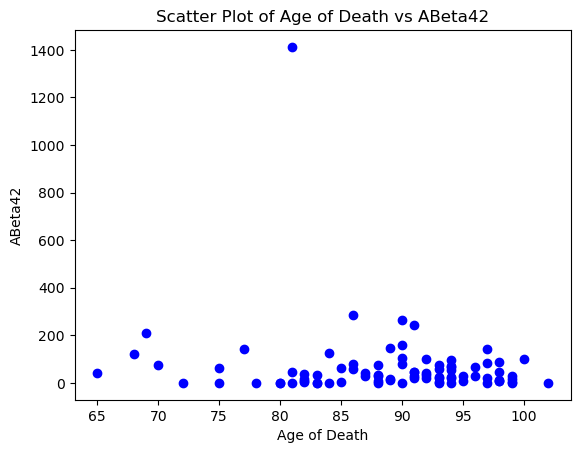

In [12]:
#10) VISUALIZE DATA ON A SCATTER PLOT

plt.scatter(X, y, color='blue')
plt.xlabel('Age of Death')
plt.ylabel('ABeta42')
plt.title('Scatter Plot of Age of Death vs ABeta42')
plt.show()


Next, we will print these data and export them in two columns as a .csv file, called 'patient_data.csv'. 

In [13]:
#11) EXPORT DATA TO A .csv FILE

import pandas as pd

print(death_age_list)
print(ABeta42)

# Create a DataFrame
df = pd.DataFrame({
    'Age of Death': death_age_list,
    'ABeta42': ABeta42
})

# Write to CSV
df.to_csv('patient_data.csv', index=False)

print("CSV file 'patient_data.csv' has been created.")

[75, 90, 102, 84, 83, 97, 72, 81, 80, 78, 88, 83, 99, 94, 93, 80, 99, 82, 93, 85, 95, 98, 82, 88, 98, 89, 98, 82, 99, 89, 94, 91, 97, 92, 93, 93, 94, 96, 88, 87, 91, 95, 99, 83, 88, 92, 82, 92, 65, 87, 98, 81, 91, 91, 94, 86, 93, 85, 75, 96, 94, 94, 70, 93, 88, 86, 90, 97, 98, 94, 92, 100, 90, 68, 84, 77, 97, 89, 90, 69, 91, 90, 86, 81]
[0.019621053, 0.049052632, 0.114736842, 0.122631579, 0.137347368, 0.147157895, 0.204385895, 0.245263158, 0.405263158, 0.405263158, 0.449649126, 0.490526316, 0.525263158, 0.525263158, 0.670526316, 0.971578947, 2.672631579, 2.744210526, 3.502105263, 4.96, 6.554736842, 6.777894737, 7.666315789, 8.842105263, 10.09578947, 10.98842105, 12.69789474, 16.13789474, 16.15684211, 18.54736842, 18.94736842, 18.994, 19.19578947, 20.18210526, 21.27368421, 24.63789474, 24.78105263, 27.33473684, 27.60947368, 28.81368421, 28.85473684, 29.89263158, 29.95578947, 31.76315789, 33.63789474, 35.27578947, 38.15894737, 39.83789474, 40.19894737, 42.51368421, 44.25684211, 45.728421

Next we will load the libraries needed to do a linear regression. 

In [14]:
#12) LOAD LIBRARIES FOR A LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Next we will load the data set from the .csv file we just made.

In [15]:
#13) LOAD DATA SET FOR A LINEAR REGRESSION

df = pd.read_csv("patient_data.csv")

Next we will select variables to plot and make a linear regression. We will use:
- **X (Independent Variable):** Age of death
- **Y (Dependent Variable):** ABeta42 pg/ug

In [16]:
#14) Update these variable names to match EXACTLY your .csv file headers

x = df["Age of Death"].values.reshape(-1, 1)
y = df["ABeta42"].values

Next we will perform a linear regression on our data. 

In [17]:
#15) Perform the linear regression

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(x, y)

Next we will make our scatterplot and add our regression line and show the equation and r^2 value.

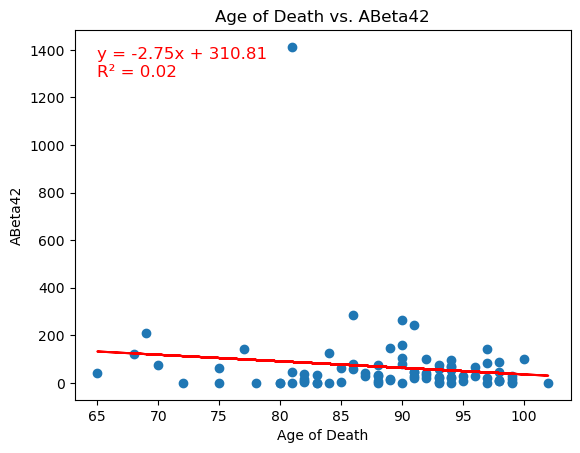

In [18]:
#16) Make scatterplot
plt.scatter(x, y, label="Data")
plt.plot(x, model.predict(x), color="red")

# Annotate equation
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}"
plt.text(x.min(), y.max(), equation, color="red", fontsize=12, verticalalignment='top')

# Annotate scatterplot with labeles and title
plt.xlabel("Age of Death")
plt.ylabel("ABeta42")
plt.title("Age of Death vs. ABeta42")
plt.show()

## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*